# Medical Data Visualizer: Cardiovascular Risk Assessment

**Author:** Hamed Ahmadinia  
**Date:** 15.2.2024

This notebook is focused on analyzing a medical examination dataset that includes various health metrics used to assess cardiovascular risk. 
The goal is to visualize trends and correlations between these medical indicators, including cholesterol, glucose, BMI, and others.

Through data visualization and analysis, we aim to gain a better understanding of the factors contributing to cardiovascular risk.

In [3]:
### Step 1: Importing Necessary Libraries
# In this step, we import the required Python libraries for data analysis and visualization. These libraries include:
#- `pandas` for handling data structures.
#- `seaborn` and `matplotlib` for data visualization.
#- `numpy` for numerical operations.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
### Step 2: Loading the Dataset
# Here, we load the dataset that contains medical examination data related to cardiovascular health. 

df = pd.read_csv('medical_examination.csv')

In [5]:
### Step 3: Calculating BMI and Creating an Overweight Column
# We calculate the Body Mass Index (BMI) for each individual using their height and weight. A BMI greater than 25 is considered overweight.
# We add a new column, 'overweight', that indicates whether a person is overweight (1) or not (0).

df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = df['BMI'].apply(lambda x: 1 if x > 25 else 0)

In [6]:
### Step 4: Normalizing Cholesterol and Glucose Data
# In this step, we normalize the cholesterol and glucose levels in the dataset. Cholesterol and glucose levels that are in the normal range are marked as 0, 
# while higher levels are marked as 1.

df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

In [7]:
### Step 5: Converting Columns to Categorical Data Types
# Here we convert necessary columns such as 'cholesterol', 'gluc', 'smoke', and 'alco' into categorical data types (as strings) to simplify visualization and analysis.

df['cholesterol'] = df['cholesterol'].astype(str)
df['gluc'] = df['gluc'].astype(str)
df['smoke'] = df['smoke'].astype(str)
df['alco'] = df['alco'].astype(str)
df['active'] = df['active'].astype(str)
df['overweight'] = df['overweight'].astype(str)

In [8]:
### Step 6: Defining the Function to Draw Categorical Plot
# We define a function to generate a categorical plot using the `seaborn` library. This function will visualize the data across different categories of health indicators such as cholesterol, glucose, smoking, alcohol consumption, and physical activity.

def draw_cat_plot():
    # Create DataFrame for categorical plot using 'pd.melt'
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Draw the categorical plot
    fig = sns.catplot(x='variable', hue='value', col='cardio', data=df_cat, kind='count')
    fig.set_axis_labels("variable", "total")
    fig = fig.fig

    return fig

In [9]:
### Step 7: Defining the Function to Draw a Heatmap
# Next, we define a function to create a heatmap to visualize the correlations between various health indicators. A heatmap provides a graphical representation of data where individual values are represented as colors, showing how variables correlate with each other.

def draw_heat_map():
    # Clean the data
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(corr)

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 8))

    # Draw the heatmap
    sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', center=0, vmax=0.3, vmin=-0.1, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})
    return fig

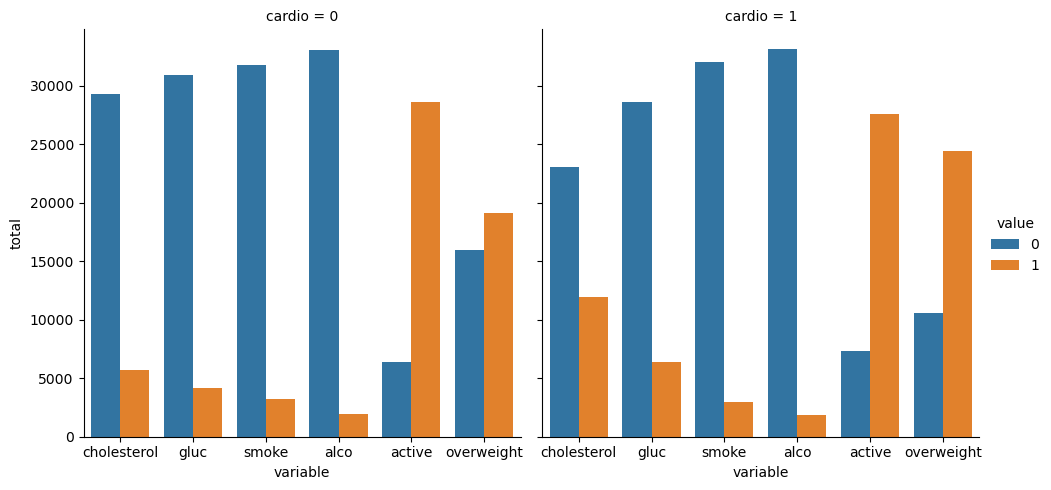

In [28]:
### Step 8: Calling the Functions to Display the Plots
# Finally, we call the functions `draw_cat_plot()` and `draw_heat_map()` to display the categorical plot and the heatmap, which will provide visual insights into the relationships between various health indicators.

# Call both functions to display the plots
cat_plot = draw_cat_plot()

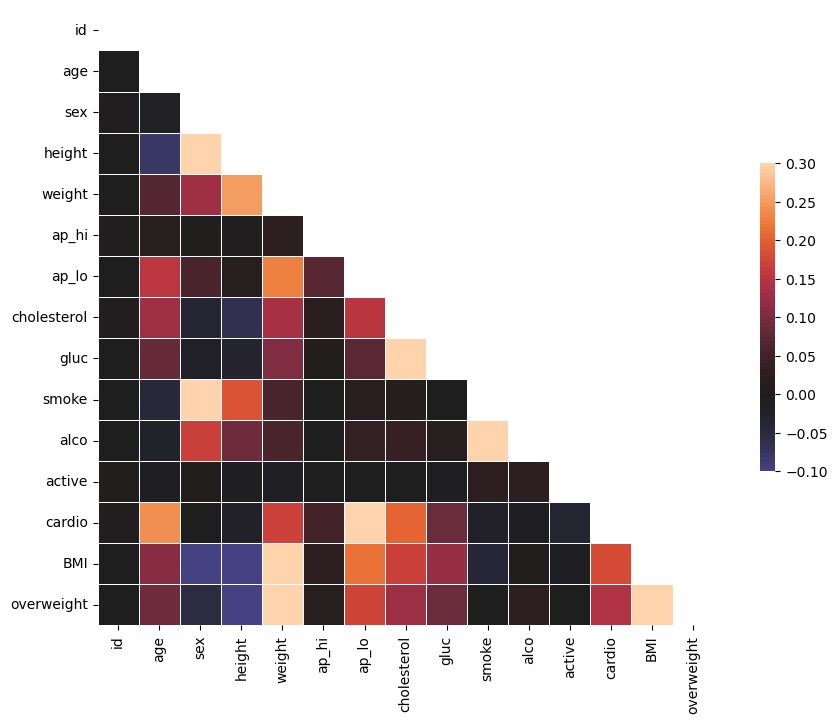

In [30]:
heat_map = draw_heat_map()